In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_df= pd.read_csv("loan.csv", encoding = "utf-8", low_memory=False)

In [2]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
#Data Cleaning
#Calculate the null values
null_series=loan_df.isnull().sum().apply(lambda x:x>=25000) #Identify null columns with more than x null values 
null_series=null_series[null_series.values]
null_series.count()

57

In [4]:
#Drop the columns with null values more than 25000
loan_df=loan_df.drop(null_series.index, axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [5]:
loan_status_total=loan_df.groupby('loan_status')['id'].count().sort_values(ascending=False)
print(loan_status_total)

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: id, dtype: int64


In [6]:
#Analysis is to understand the defaulter, the current status can be removed from the data set
loan_df=loan_df.drop(loan_df[loan_df.loan_status=="Current"].index)

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
id                            38577 non-null int64
member_id                     38577 non-null int64
loan_amnt                     38577 non-null int64
funded_amnt                   38577 non-null int64
funded_amnt_inv               38577 non-null float64
term                          38577 non-null object
int_rate                      38577 non-null object
installment                   38577 non-null float64
grade                         38577 non-null object
sub_grade                     38577 non-null object
emp_title                     36191 non-null object
emp_length                    37544 non-null object
home_ownership                38577 non-null object
annual_inc                    38577 non-null float64
verification_status           38577 non-null object
issue_d                       38577 non-null object
loan_status                   38577 non-null object
pymnt_pl

In [8]:
uniques = loan_df.apply(lambda x: x.nunique())
loan_df=loan_df.drop(uniques[uniques==1].index, axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 43 columns):
id                         38577 non-null int64
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
int_rate                   38577 non-null object
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36191 non-null object
emp_length                 37544 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null object
loan_status                38577 non-null object
url                        38577 non-null object
desc      

In [9]:
#Since we are not analysing whether a current user will default or not. We donot need payment related information. We can use loan_status to identify a user as defaulter/not. We can drop columns 
#total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt and last_credit_pull_d
loan_df=loan_df.drop(['total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
id                         38577 non-null int64
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
int_rate                   38577 non-null object
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36191 non-null object
emp_length                 37544 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null object
loan_status                38577 non-null object
url                        38577 non-null object
desc      

In [10]:
loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2386
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12527
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

In [11]:
# Description ,employment title and public record of bankruptices does not make any correlation to defaulting of payments. removing those records
#loan_df=loan_df.drop(['emp_title','desc','pub_rec_bankruptcies','title','url'],axis=1)
loan_df=loan_df.drop(['emp_title','desc','title','url'],axis=1)
loan_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
total_pymnt_inv               0
collection_recovery_fee       0
pub_rec_bankruptcies        697
dtype: i

In [12]:
# Total credit revolving balance and Revolving line utilization rate does not make any correlation to defaulting of payments. removing those records
loan_df=loan_df.drop(['revol_bal','revol_util','collection_recovery_fee','total_pymnt_inv'],axis=1)
loan_df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [13]:
import re
# Function to prune year String

def getYear(yearString):
    if '<' in yearString:
        return str(0)
    elif '+' in yearString:
        return str(10)
    elif 'year' in yearString:
        print(yearString)
        return str(re.findall('\d+', yearString)[0])
vectorisedGetYear = np.vectorize(getYear, otypes=[np.ndarray])  

In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
id                      38577 non-null int64
member_id               38577 non-null int64
loan_amnt               38577 non-null int64
funded_amnt             38577 non-null int64
funded_amnt_inv         38577 non-null float64
term                    38577 non-null object
int_rate                38577 non-null object
installment             38577 non-null float64
grade                   38577 non-null object
sub_grade               38577 non-null object
emp_length              37544 non-null object
home_ownership          38577 non-null object
annual_inc              38577 non-null float64
verification_status     38577 non-null object
issue_d                 38577 non-null object
loan_status             38577 non-null object
purpose                 38577 non-null object
zip_code                38577 non-null object
addr_state              38577 non-null object
dti               

In [15]:
loan_df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,860xx,AZ,27.65,0,Jan-85,1,3,0,9,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,309xx,GA,1.00,0,Apr-99,5,3,0,4,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,606xx,IL,8.72,0,Nov-01,2,2,0,10,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,917xx,CA,20.00,0,Feb-96,1,10,0,37,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,852xx,AZ,11.20,0,Nov-04,3,9,0,12,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,280xx,NC,23.51,0,Jul-05,1,7,0,11,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,900xx,CA,5.35,0,Jan-07,2,4,0,4,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,958xx,CA,5.55,0,Apr-04,2,11,0,13,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,774xx,TX,18.08,0,Sep-04,0,2,0,3,0.0
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,...,853xx,AZ,16.12,0,Jan-98,2,14,0,23,0.0


In [16]:
#Standardize the inputs for term, int_rate, installment & employment length
loan_df['installment']=round(loan_df['installment'],0)
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:x[:-1])

In [17]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [18]:
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:float(x))

In [19]:
loan_df=loan_df.drop(loan_df[loan_df.emp_length=='n/a'].index)

In [20]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [21]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
id                      38577 non-null int64
member_id               38577 non-null int64
loan_amnt               38577 non-null int64
funded_amnt             38577 non-null int64
funded_amnt_inv         38577 non-null float64
term                    38577 non-null object
int_rate                38577 non-null float64
installment             38577 non-null float64
grade                   38577 non-null object
sub_grade               38577 non-null object
emp_length              37544 non-null object
home_ownership          38577 non-null object
annual_inc              38577 non-null float64
verification_status     38577 non-null object
issue_d                 38577 non-null object
loan_status             38577 non-null object
purpose                 38577 non-null object
zip_code                38577 non-null object
addr_state              38577 non-null object
dti              

In [22]:
installment_wise_total = loan_df.groupby('loan_status')['installment'].count().sort_values(ascending=True)
installment_wise_total

loan_status
Charged Off     5627
Fully Paid     32950
Name: installment, dtype: int64

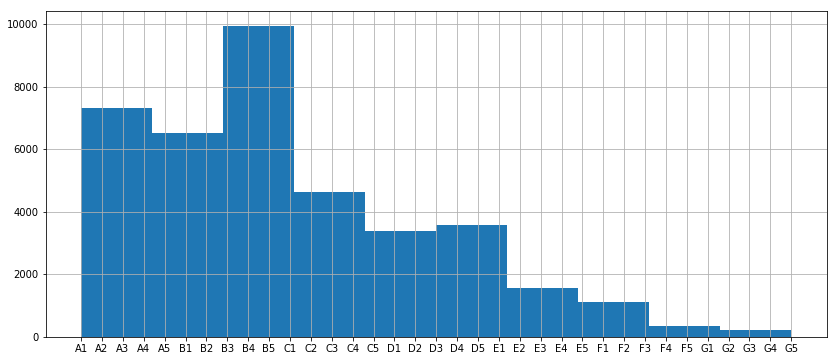

In [23]:
#uni-variate analysis on the unordered categorical values on the sub-grade
p=loan_df['sub_grade'].hist(figsize=[14,6])
plt.show()

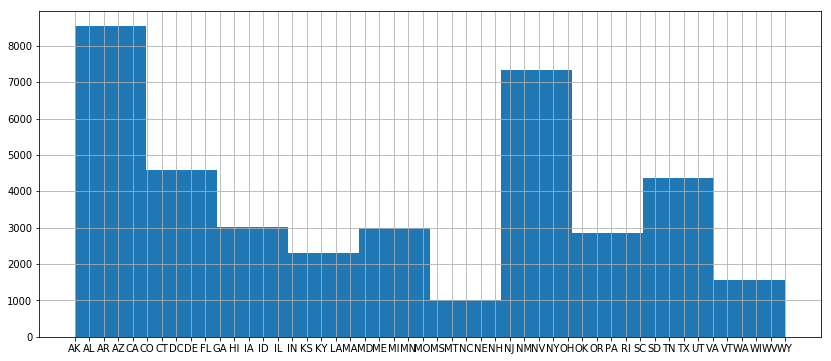

In [24]:
#uni-variate analysis on the unordered categorical values on the addr_state
p=loan_df['addr_state'].hist(figsize=[14,6])
plt.show()

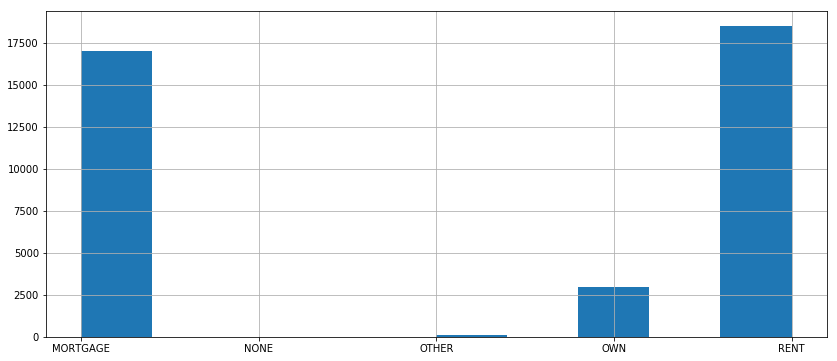

In [25]:
#uni-variate analysis on the unordered categorical values on the home ownership
p=loan_df['home_ownership'].hist(figsize=[14,6])
plt.show()

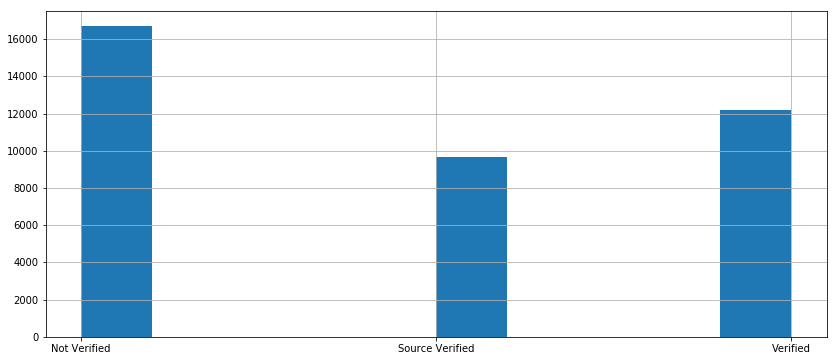

In [26]:
p=loan_df['verification_status'].hist(figsize=[14,6])
plt.show()

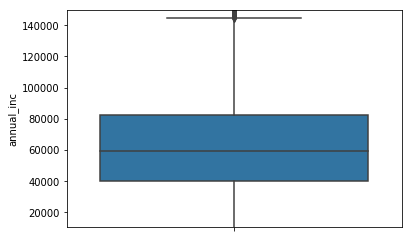

In [27]:
sns.boxplot(y=loan_df['annual_inc'])
#plt.yscale('log')
plt.ylim(10000, 150000)
plt.show()

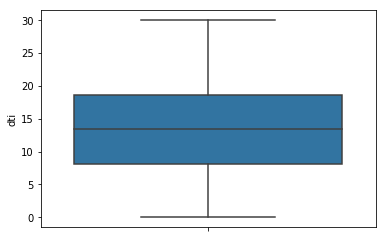

In [28]:
sns.boxplot(y=loan_df['dti'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.show()

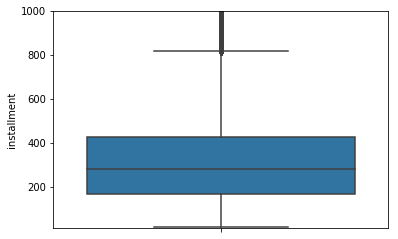

In [29]:
sns.boxplot(y=loan_df['installment'])
#plt.yscale('log')
plt.ylim(10, 1000)
plt.show()

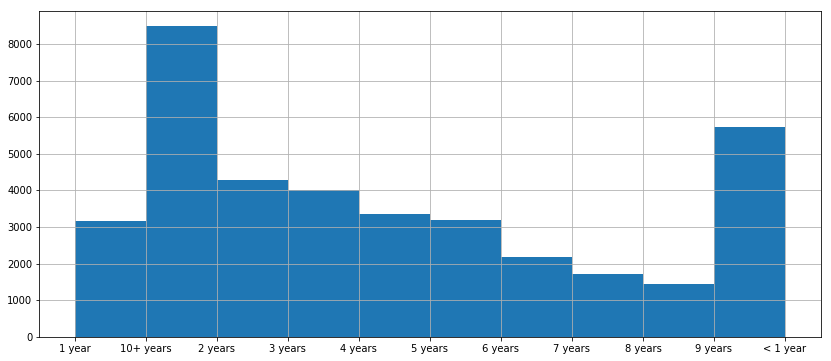

In [30]:
p=loan_df['emp_length'].hist(figsize=[14,6])
plt.show()

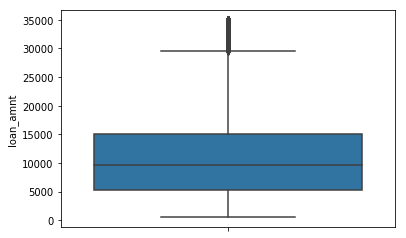

In [31]:
sns.boxplot(y=loan_df['loan_amnt'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.show()

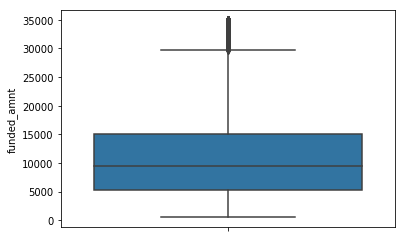

In [32]:
sns.boxplot(y=loan_df['funded_amnt'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.show()

In [33]:
#uni-variate analysis on the on the continuous variable 
def plot_graph(df, param,lower,upper):
    fully_paid_df=loan_df[loan_df.loan_status == 'Fully Paid']
    default_paid_df=loan_df[loan_df.loan_status == 'Charged Off']
    
    plt.figure(figsize=(20, 10)) 
    plt.subplot(1,2,1)
    sns.boxplot(y=default_paid_df[param])
    plt.title(param +' distribution for Default ',fontsize=20)
    plt.ylim(lower, upper)
    
    plt.subplot(1,2,2)
    sns.boxplot(y=fully_paid_df[param])
    plt.title(param +' distribution for Fully Paid ',fontsize=20)
    plt.ylim(lower, upper)
    plt.show()

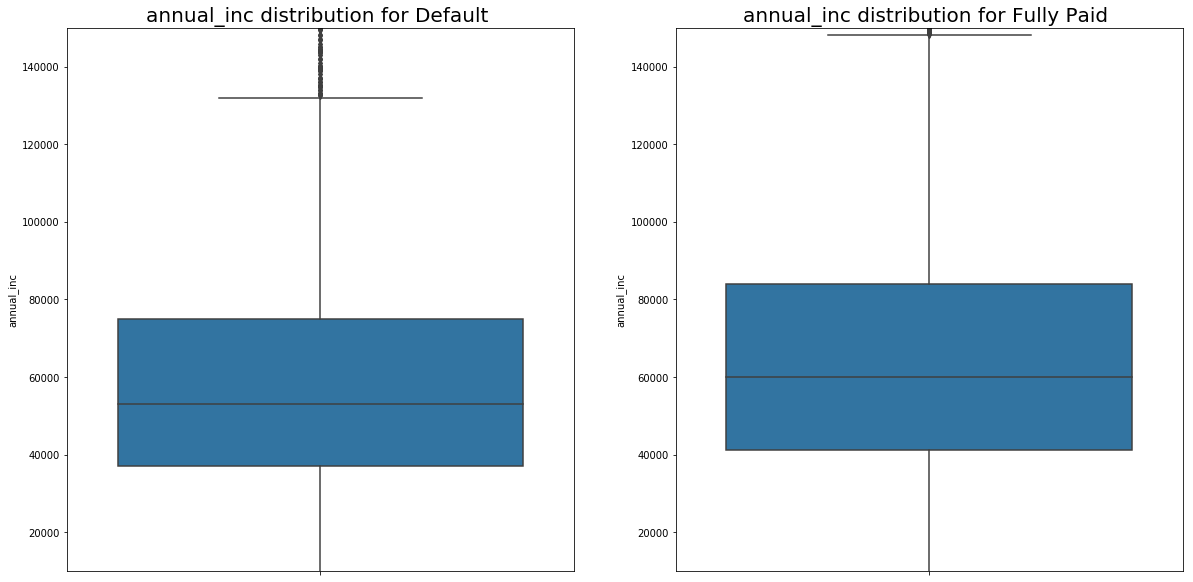

In [34]:
plot_graph(loan_df,'annual_inc',10000,150000)

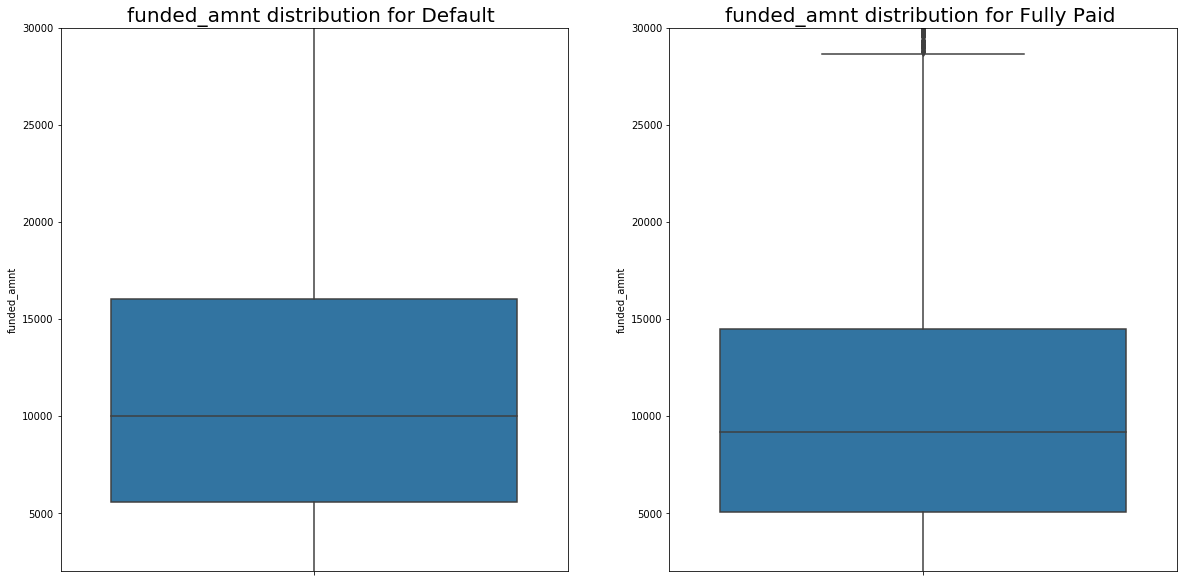

In [35]:
plot_graph(loan_df,'funded_amnt',2000,30000)

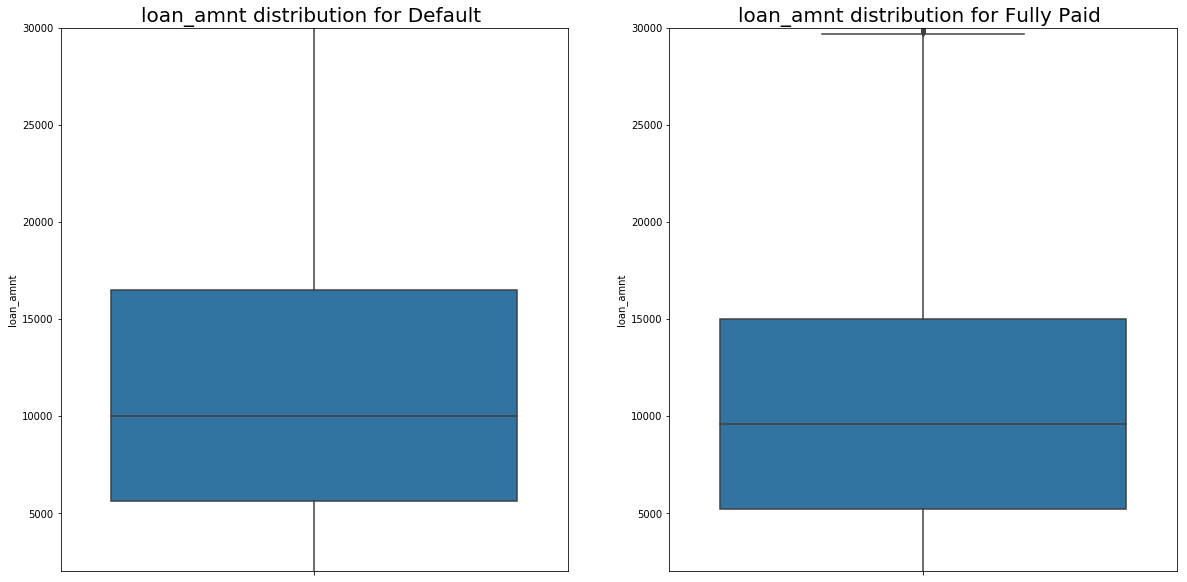

In [36]:
plot_graph(loan_df,'loan_amnt',2000,30000)

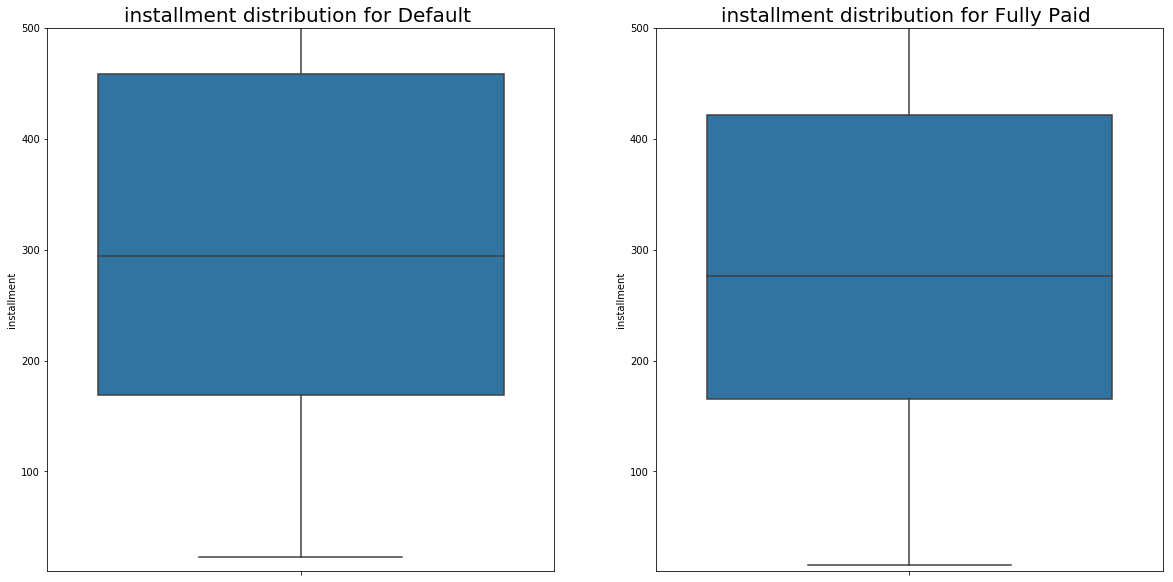

In [37]:
plot_graph(loan_df,'installment',10,500)

In [38]:
fully_paid_df=loan_df[loan_df.loan_status == 'Fully Paid']
default_paid_df=loan_df[loan_df.loan_status  == 'Charged Off']

In [39]:
def plot_pie_chart(col_name,df,title):
    label_list=df.index
    colors = ['green','orange','red','yellow','purple']
    plt.figure(1, figsize=(8,6))
    plt.axis('equal')
    plt.pie(df,labels=label_list,autopct="%1.1f%%",colors=colors,startangle=90) 
    plt.title(title) 
    plt.show()

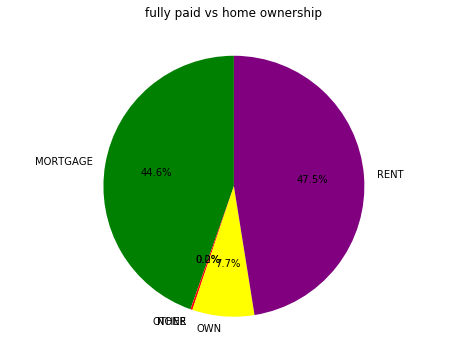

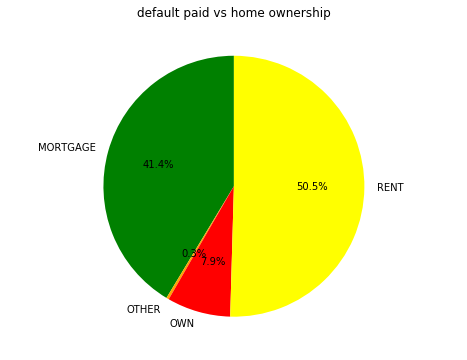

In [40]:
df2 = fully_paid_df.home_ownership.groupby(loan_df.home_ownership).count()
plot_pie_chart("home_ownership",df2,"fully paid vs home ownership")

df2 = default_paid_df.home_ownership.groupby(loan_df.home_ownership).count()
plot_pie_chart("home_ownership",df2,"default paid vs home ownership")

In [41]:
loan_df.groupby(['loan_status', 'home_ownership']).id.agg(['count'])
#create a pie-chart with the percentage to understand the distribution
#ToDO

count
loan_status home_ownership       
Charged Off MORTGAGE         2327
            OTHER              18
            OWN               443
            RENT             2839
Fully Paid  MORTGAGE        14694
            NONE                3
            OTHER              80
            OWN              2532
            RENT            15641

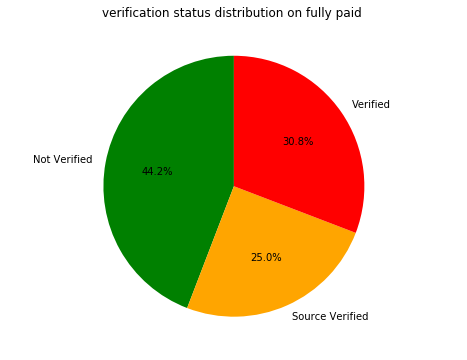

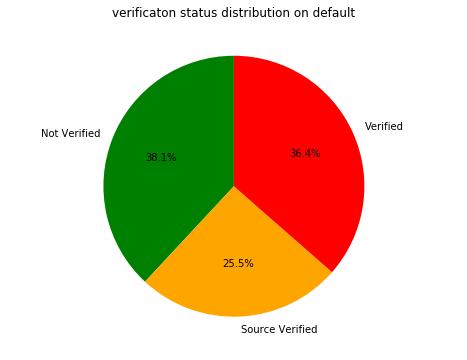

In [42]:
df2 = fully_paid_df.verification_status.groupby(loan_df.verification_status).count()
plot_pie_chart("home_ownership",df2,"verification status distribution on fully paid ")

df2 = default_paid_df.verification_status.groupby(loan_df.verification_status).count()
plot_pie_chart("home_ownership",df2,"verificaton status distribution on default")

In [43]:
loan_df.groupby(['loan_status', 'verification_status']).id.agg(['count'])
#create a pie-chart with the percentage to understand the distribution
#ToDO

count
loan_status verification_status       
Charged Off Not Verified          2142
            Source Verified       1434
            Verified              2051
Fully Paid  Not Verified         14552
            Source Verified       8243
            Verified             10155

In [44]:
loan_df.groupby(['loan_status', 'addr_state']).id.agg(['count'])
#create a pie-chart with the percentage to understand the distribution
#ToDO

count
loan_status addr_state       
Charged Off AK             15
            AL             54
            AR             27
            AZ            123
            CA           1125
            CO             98
            CT             94
            DC             15
            DE             12
            FL            504
            GA            215
            HI             28
            ID              1
            IL            197
            KS             31
            KY             45
            LA             53
            MA            159
            MD            162
            MI            103
            MN             81
            MO            114
            MS              2
            MT             11
            NC            114
            NE              3
            NH             25
            NJ            278
            NM             30
            NV            108
...                       ...
Fully Paid  MD            861
            ME              3
            MI            601
            MN            524
            MO            556
            MS             17
            MT             72
            NC            636
            NE              2
            NH            141
            NJ           1512
            NM            153
            NV            371
            NY           3203
            OH           1023
            OK            247
            OR            364
            PA           1288
            RI            169
            SC            393
            SD             50
            TN             15
            TX           2343
            UT            212
            VA           1192
            VT             47
            WA            691
            WI            377
            WV            151
            WY             76

[97 rows x 1 columns]

In [45]:
loan_df.groupby(['loan_status', 'emp_length']).id.agg(['count'])
#create a pie-chart with the percentage to understand the distribution
#ToDO

count
loan_status emp_length       
Charged Off 1 year        456
            10+ years    1331
            2 years       567
            3 years       555
            4 years       462
            5 years       458
            6 years       307
            7 years       263
            8 years       203
            9 years       158
            < 1 year      639
Fully Paid  1 year       2713
            10+ years    7157
            2 years      3724
            3 years      3457
            4 years      2880
            5 years      2736
            6 years      1861
            7 years      1448
            8 years      1232
            9 years      1068
            < 1 year     3869

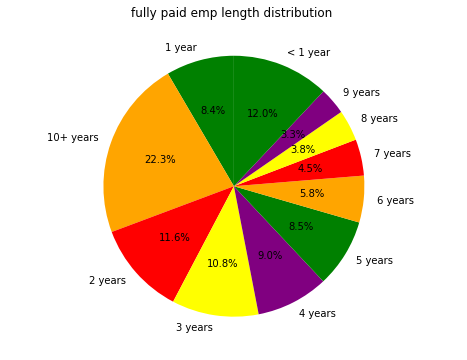

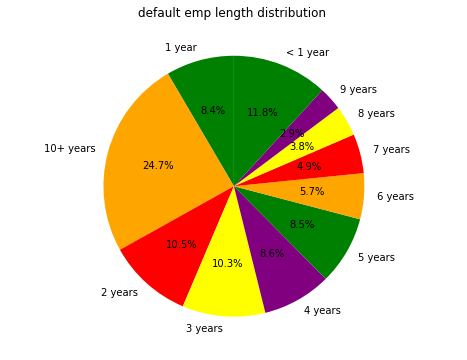

In [46]:
df2 = fully_paid_df.emp_length.groupby(loan_df.emp_length).count()
plot_pie_chart("emp_length",df2,"fully paid emp length distribution ")

df2 = default_paid_df.emp_length.groupby(loan_df.emp_length).count()
plot_pie_chart("emp_length",df2,"default emp length distribution ")

In [47]:
rate_wise_total = loan_df.groupby('loan_status')['dti'].median().sort_values(ascending=True)
rate_wise_total
#create a pie-chart with the percentage to understand the distribution
#ToDO

loan_status
Fully Paid     13.20
Charged Off    14.29
Name: dti, dtype: float64

In [48]:
loan_df['charged_off'] = 0 #initialize with 0 for Charged Off
loan_df['fully_paid']  = 0 #initialize with 0 for fully paid
loan_df.loc[loan_df.loan_status =='Charged Off','charged_off']=1
loan_df.loc[loan_df.loan_status =='Fully Paid','fully_paid']=1

In [49]:
def plot_for_seg_univariate(column_name,df_segment):
    plt.suptitle('Segmented Univariate Analysis (' + column_name + ')', fontsize=24)
    plt.rc("font", size=10)
    plt.figure(figsize=(20, 10))
    sns.barplot(x=df_segment.index, y='debt_default_index', data=df_segment)
    plt.title('Debt Default Index vs ' + column_name)
    plt.xlabel(column_name,rotation=0, fontsize=20, labelpad=20)
    plt.xticks(rotation=45,fontsize=10)
    plt.ylabel('Debt Default Index',rotation=90, fontsize=20, labelpad=20)
    plt.show()
    return

In [50]:
def debt_default_by_segment(column ,showsize=10):
        loan_df_column_status=loan_df.pivot_table(values=['charged_off','fully_paid'],index=[column],aggfunc=('sum'))
        loan_df_column_status['percent_charged_off']= round(100*loan_df_column_status.charged_off/(loan_df_column_status.charged_off + loan_df_column_status.fully_paid),2)
        loan_df_column_status['debt_default_index']= loan_df_column_status.charged_off/(loan_df_column_status.charged_off+loan_df_column_status.fully_paid)
        loan_df_column_status.head(showsize)
        return loan_df_column_status

In [51]:
def debt_default_by_segment_numbins(column ,new_bin_col_name,binval,showsize=10):
        #bins = np.linspace(loan_df[column].min(), loan_df[column].max(), binval)
        loan_df[new_bin_col_name] = pd.cut(loan_df[column], binval)
        loan_df_column_status=loan_df.pivot_table(values=['charged_off','fully_paid'],index=[new_bin_col_name],aggfunc=('sum'))
        loan_df_column_status['percent_charged_off']= round(100*loan_df_column_status.charged_off/(loan_df_column_status.charged_off + loan_df_column_status.fully_paid),2)
        loan_df_column_status['debt_default_index']= loan_df_column_status.charged_off/(loan_df_column_status.charged_off+loan_df_column_status.fully_paid)
        loan_df_column_status.head(showsize)
        return loan_df_column_status

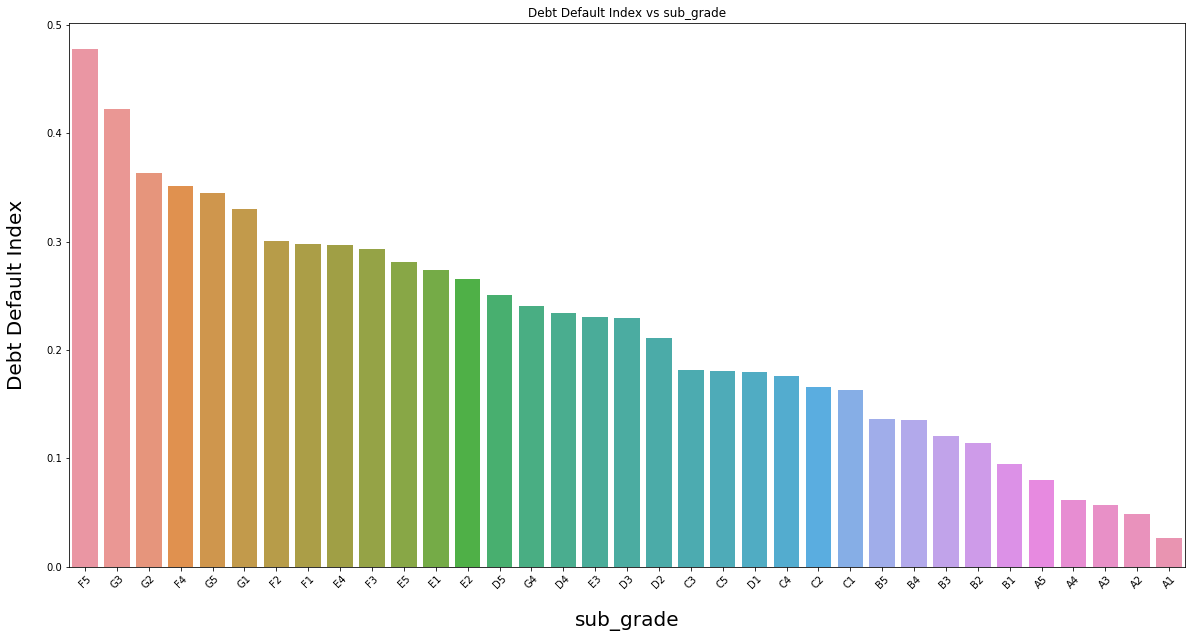

In [52]:
#Derive loan grade v/s Debt defaulters index table based on the grade
df2=debt_default_by_segment('sub_grade').sort_values(by='percent_charged_off',ascending=False)
plot_for_seg_univariate('sub_grade',df2)

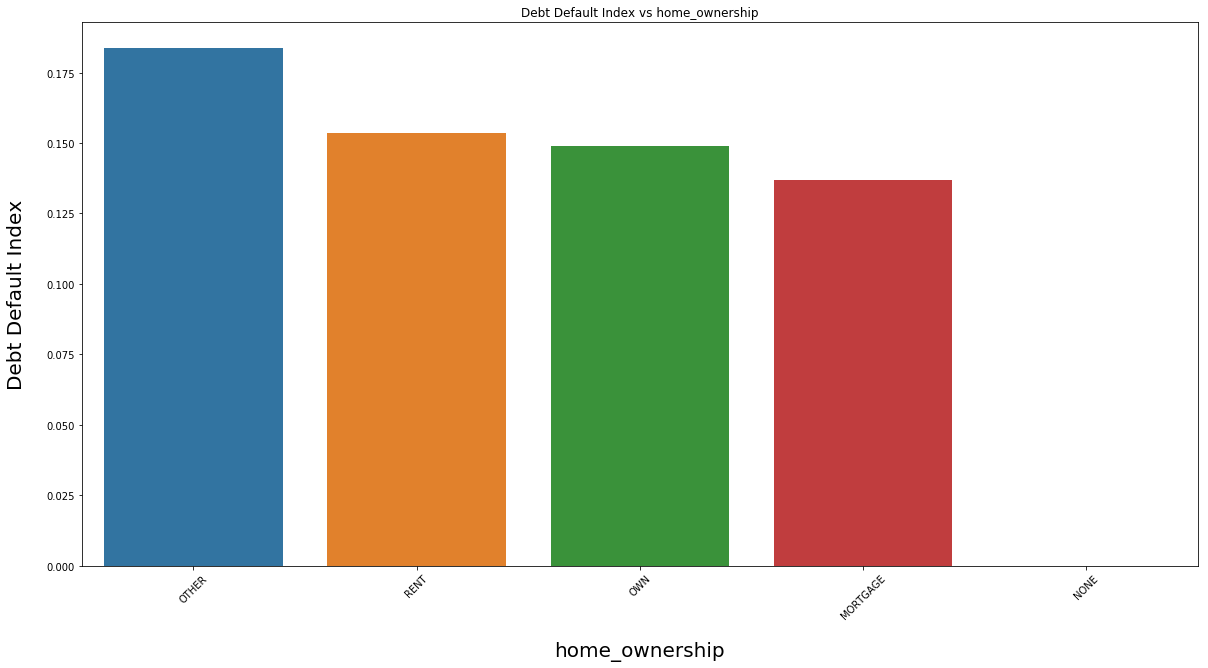

In [53]:
df2=debt_default_by_segment('home_ownership').sort_values(by='percent_charged_off',ascending=False)
plot_for_seg_univariate('home_ownership',df2)

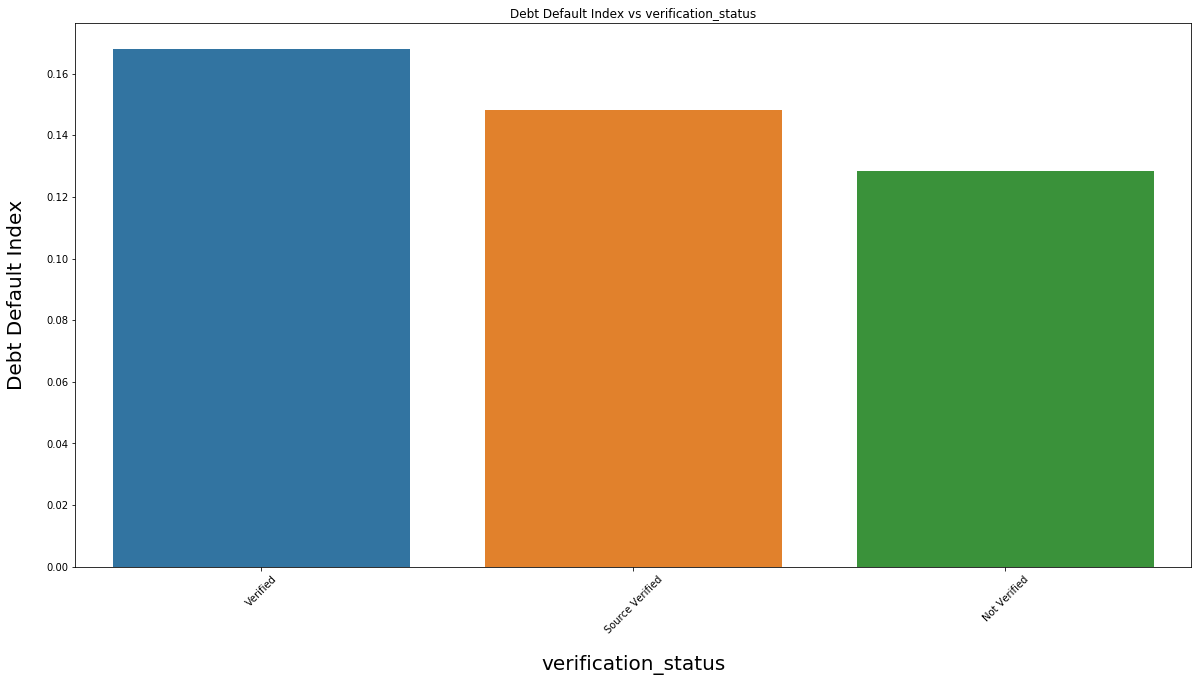

In [54]:
df2=debt_default_by_segment('verification_status').sort_values(by='percent_charged_off',ascending=False)
plot_for_seg_univariate('verification_status',df2)

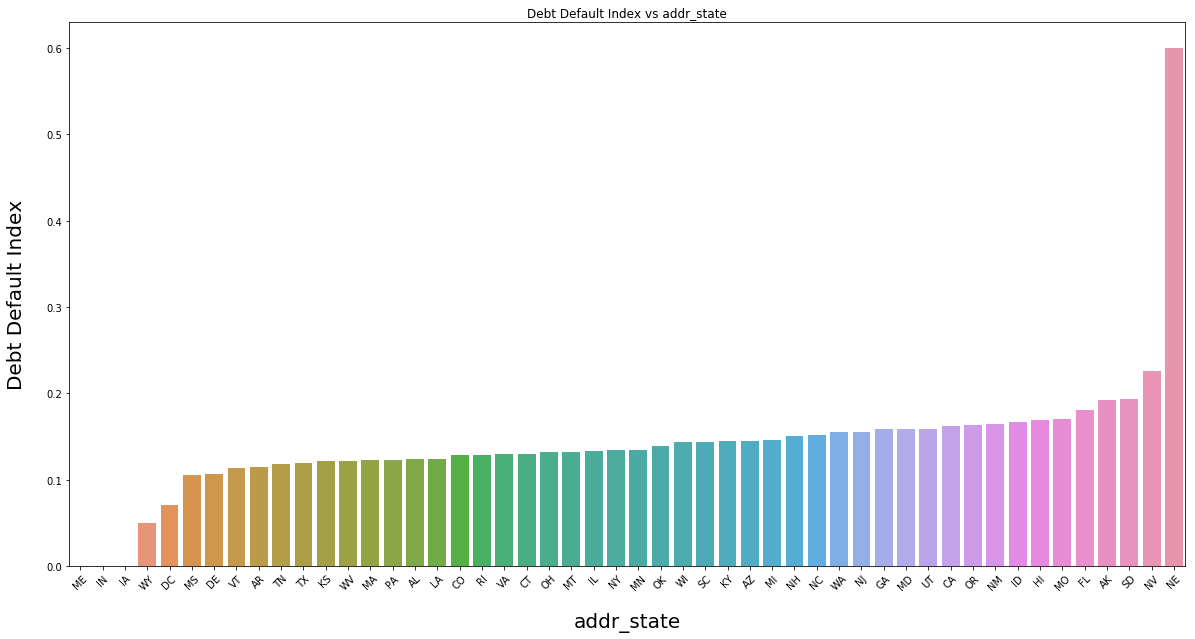

In [55]:
df2=debt_default_by_segment('addr_state').sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('addr_state',df2)

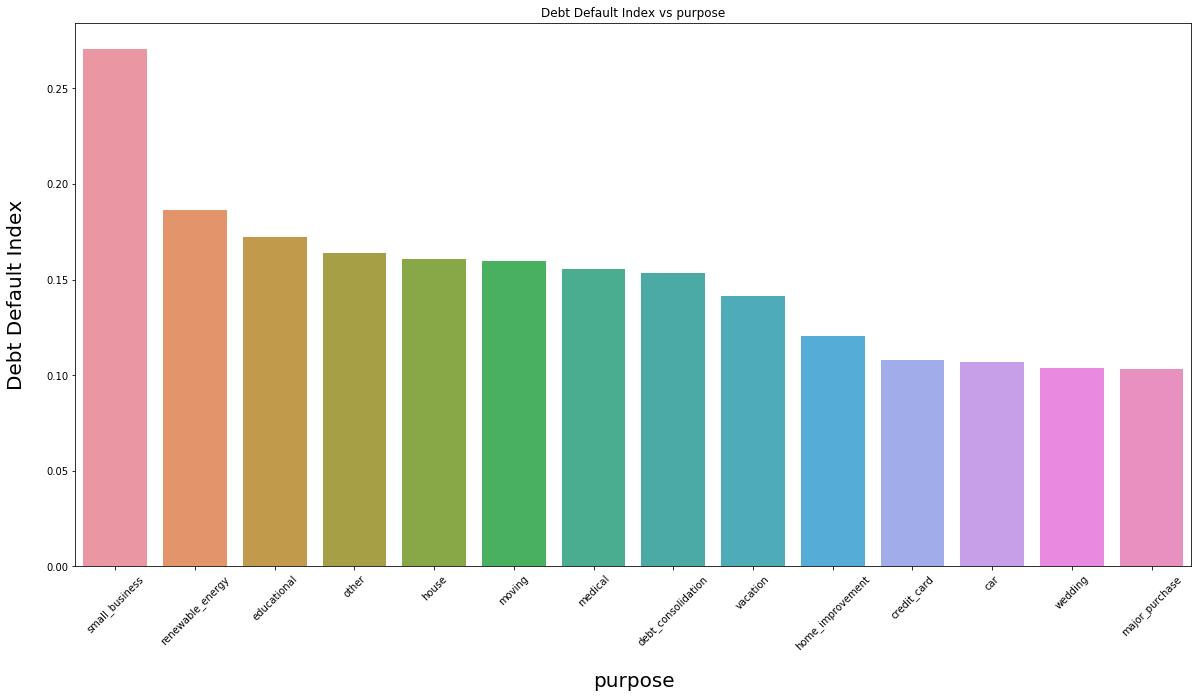

In [56]:
df2=debt_default_by_segment('purpose').sort_values(by='percent_charged_off',ascending=False)
plot_for_seg_univariate('purpose',df2)

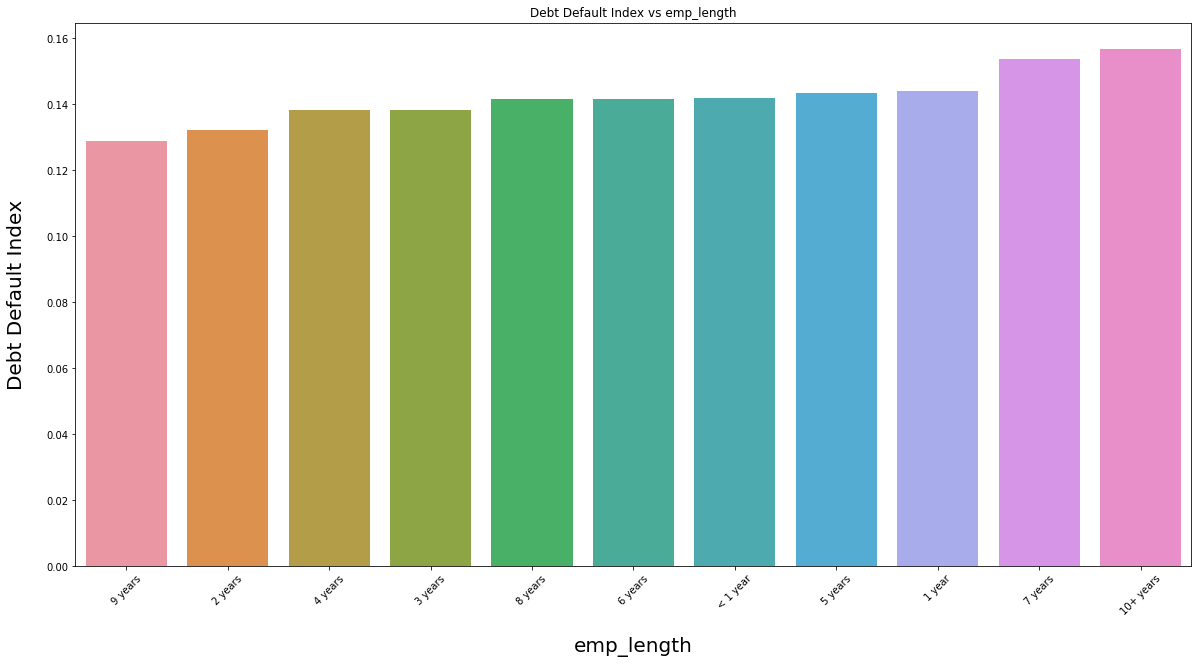

In [57]:
df2=debt_default_by_segment('emp_length').sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('emp_length',df2)

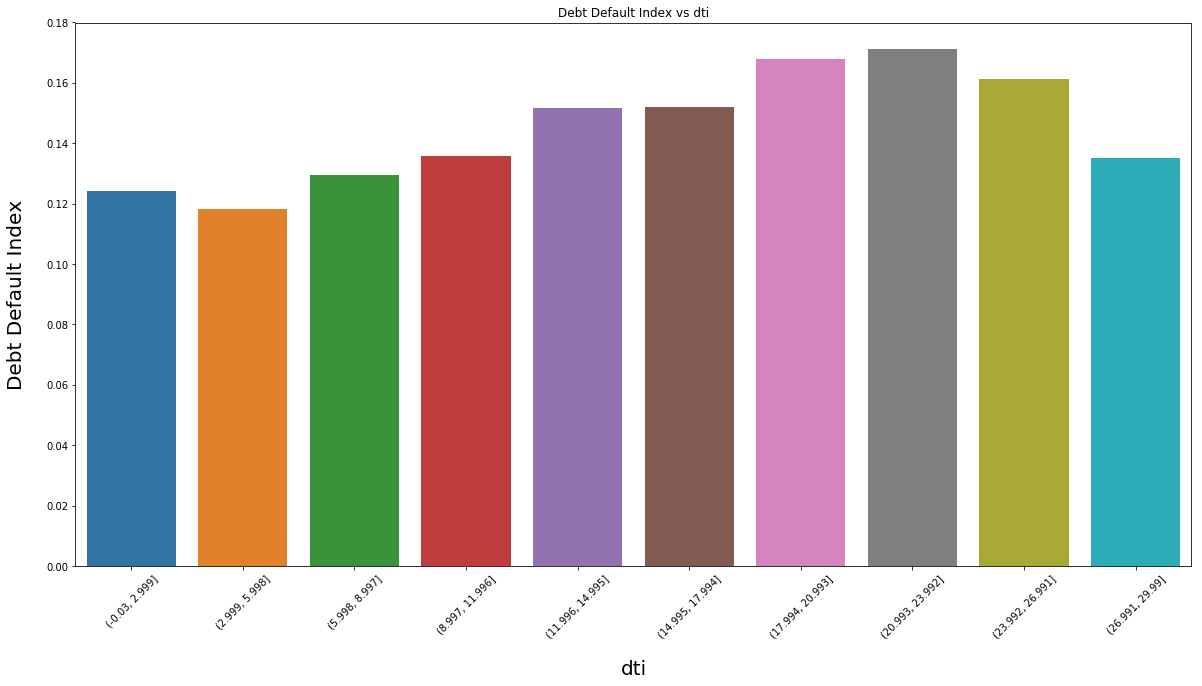

In [58]:
df2=debt_default_by_segment_numbins('dti','dti_group',10).sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('dti',df2)

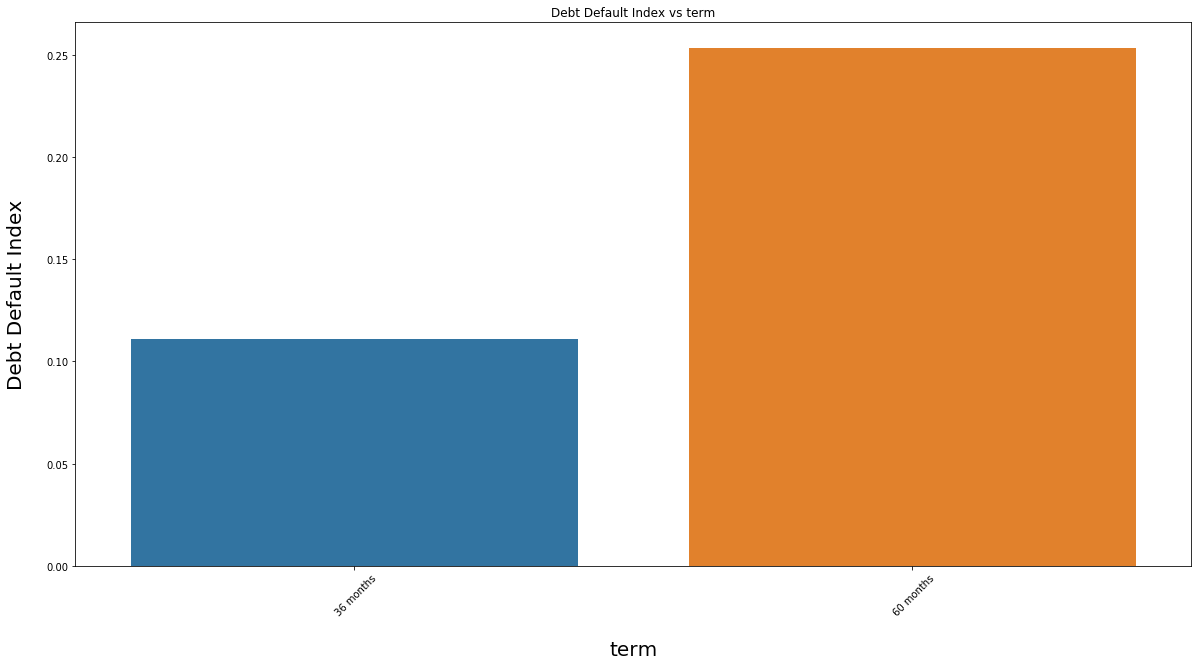

In [59]:
df2=debt_default_by_segment('term').sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('term',df2)

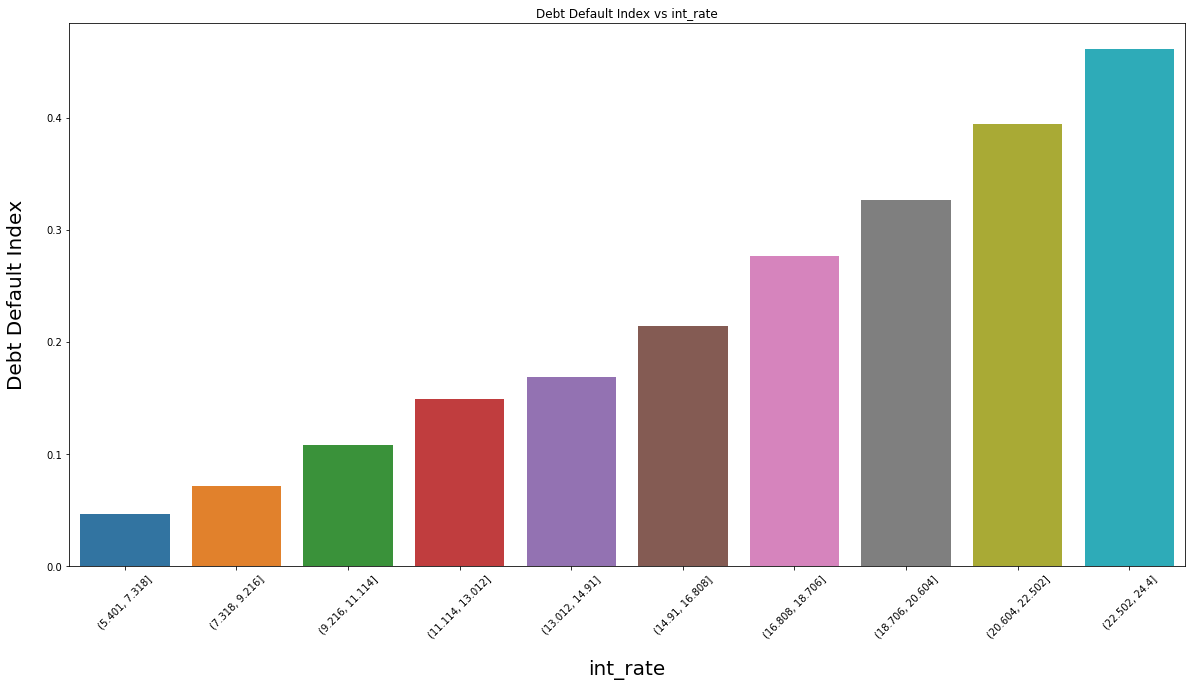

In [60]:
df2=debt_default_by_segment_numbins('int_rate','int_group',10).sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('int_rate',df2)

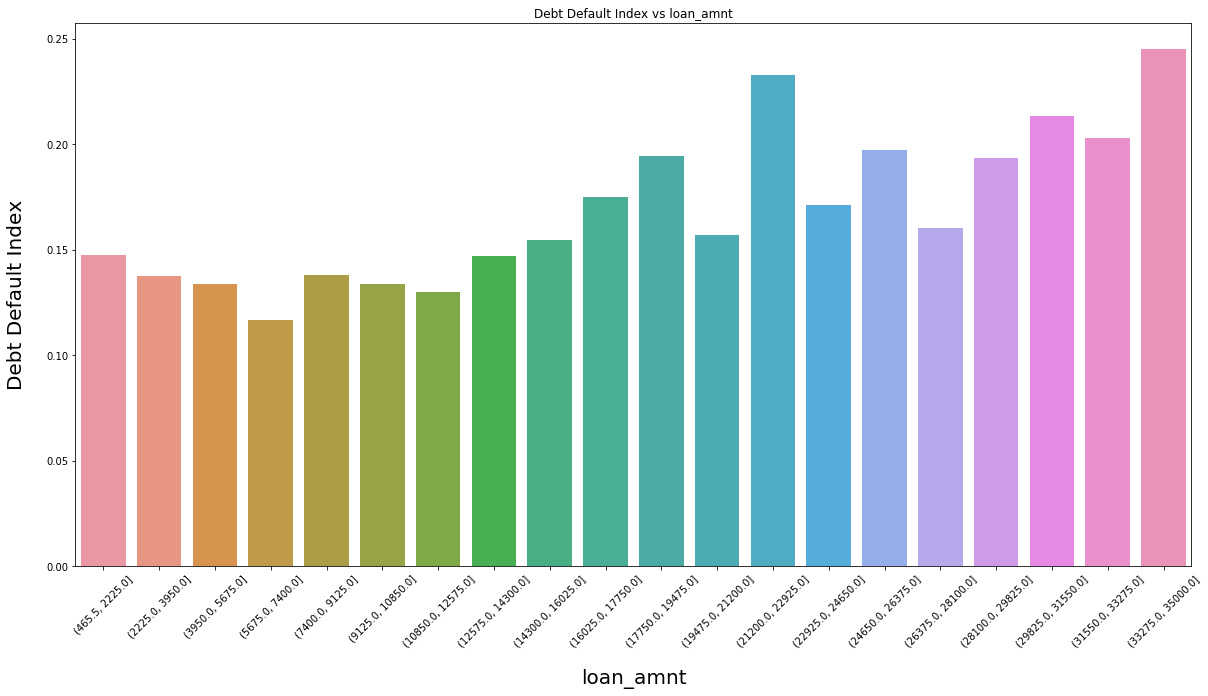

In [61]:
df2=debt_default_by_segment_numbins('loan_amnt','loan_amt_group',20).sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('loan_amnt',df2)

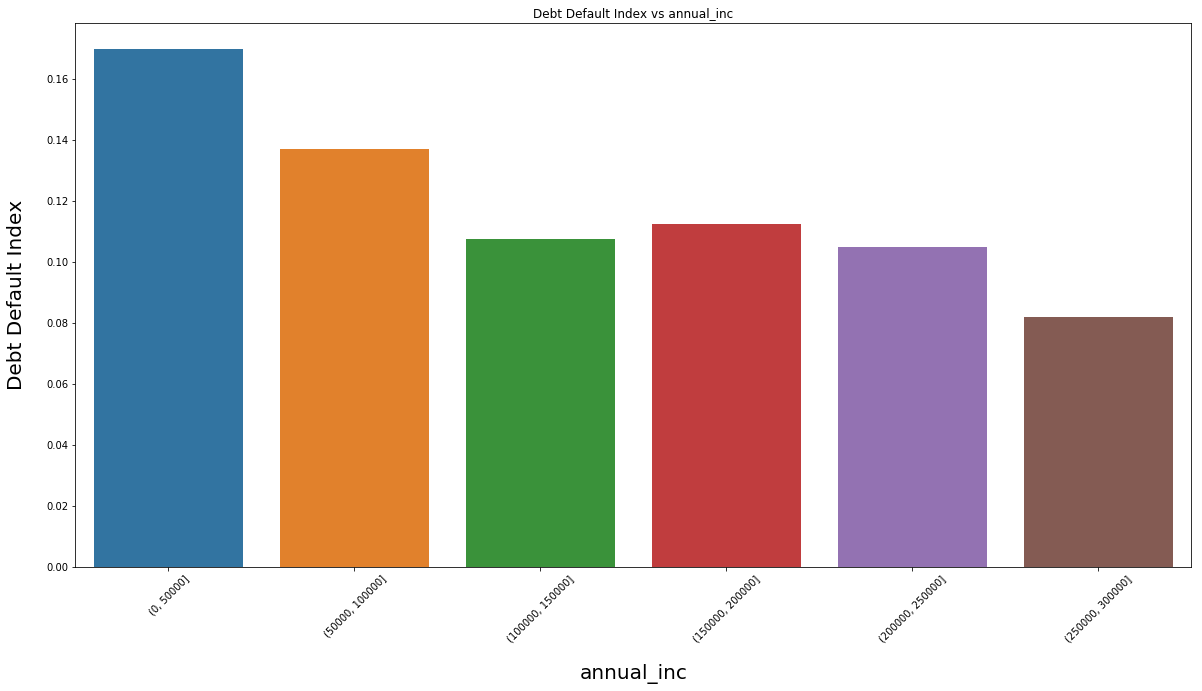

In [62]:
income_group_ordinal=list(np.arange(0,350000,50000))
df2=debt_default_by_segment_numbins('annual_inc','income_group',income_group_ordinal).sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('annual_inc',df2)

In [63]:
#Bi-variate analysis on the continuous variables part of the data
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,charged_off,fully_paid
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000,38577.000000,38577.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,11.932219,322.470125,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,22.052648,0.043479,0.145864,0.854136
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,3.691327,208.635488,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,11.425861,0.204583,0.352975,0.352975
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,16.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,8.940000,166.000000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,13.000000,0.000000,0.000000,1.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,11.710000,278.000000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,20.000000,0.000000,0.000000,1.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,14.380000,426.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,29.000000,0.000000,0.000000,1.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,2.000000,1.000000,1.000000


In [64]:
#EDADF_sub = loan_df._get_numeric_data()
#sns.heatmap(EDADF_sub, annot=True,
#          xticklabels=EDADF_sub.columns.values,
#          yticklabels=EDADF_sub.columns.values)
#plt.show()

In [65]:
#Bi-variate analysis on the continous variables (loan_amount vs interest rate)
#fully_paid_df.plot(kind='scatter', y='loan_amnt', x='funded_amnt', ylim=((0, 50000)), xlim=((0, 50000)))
#plt.show()
#default_paid_df.plot(kind='scatter', y='loan_amnt', x='funded_amnt', ylim=((0, 50000)), xlim=((0, 50000)))
#plt.show()

In [66]:
#Bi-variate analysis on the continous variables (loan_amount vs interest rate)
#fully_paid_df.plot(kind='scatter', x='loan_amnt', y='annual_inc', xlim=((0, 50000)), ylim=((0, 500000)))
#plt.show()
#default_paid_df.plot(kind='scatter', x='loan_amnt', y='annual_inc', xlim=((0, 50000)), ylim=((0, 500000)))
#plt.show()

In [67]:
#Bi-variate analysis on the continous variables (loan_amount vs interest rate)
#fully_paid_df.plot(kind='bar', x='total_acc', y='inq_last_6mths', ylim=((1, 10)), xlim=((0, 10)))
#plt.show()
#default_paid_df.plot(kind='bar', x='total_acc', y='inq_last_6mths', ylim=((1, 10)), xlim=((0, 10)))
#plt.show()

In [68]:
#Bi-variate analysis on the continous variables (loan_amount vs interest rate)
#fully_paid_df.plot(kind='scatter', x='total_acc',y='delinq_2yrs', ylim=((1, 40)), xlim=((0, 40)))
#plt.show()
#default_paid_df.plot(kind='scatter', x='total_acc', y='delinq_2yrs', ylim=((1, 40)), xlim=((0, 40)))
#plt.show()

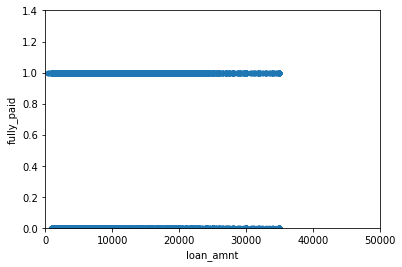

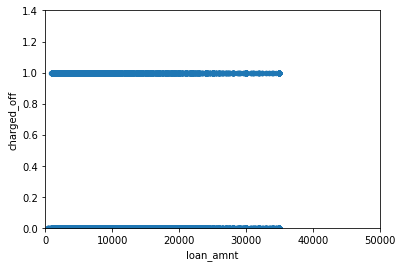

In [69]:
#Bi-variate analysis on the continous variables (delinq_2yrs vs fully paid )
loan_df.plot(kind='scatter', y='fully_paid',x='loan_amnt', xlim=((0, 50000)), ylim=((0, 1.4)))
plt.show()
loan_df.plot(kind='scatter', y='charged_off', x='loan_amnt', xlim=((0, 50000)), ylim=((0, 1.4)))
plt.show()

No handles with labels found to put in legend.


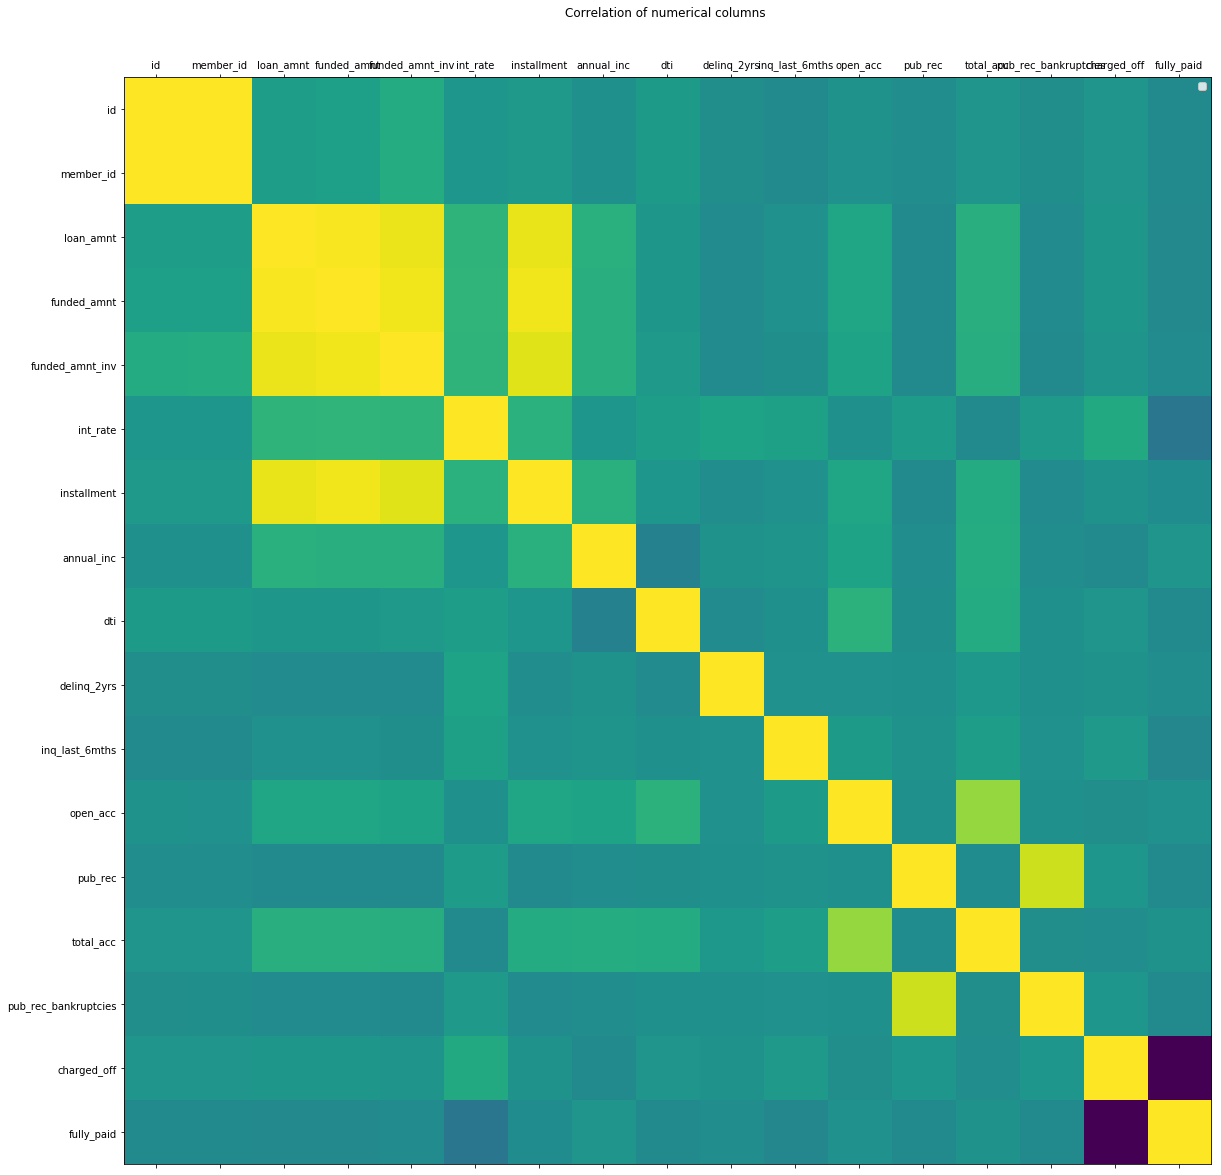

In [70]:
corr = loan_df._get_numeric_data().corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
ax.legend()
plt.title('Correlation of numerical columns ')
plt.show()

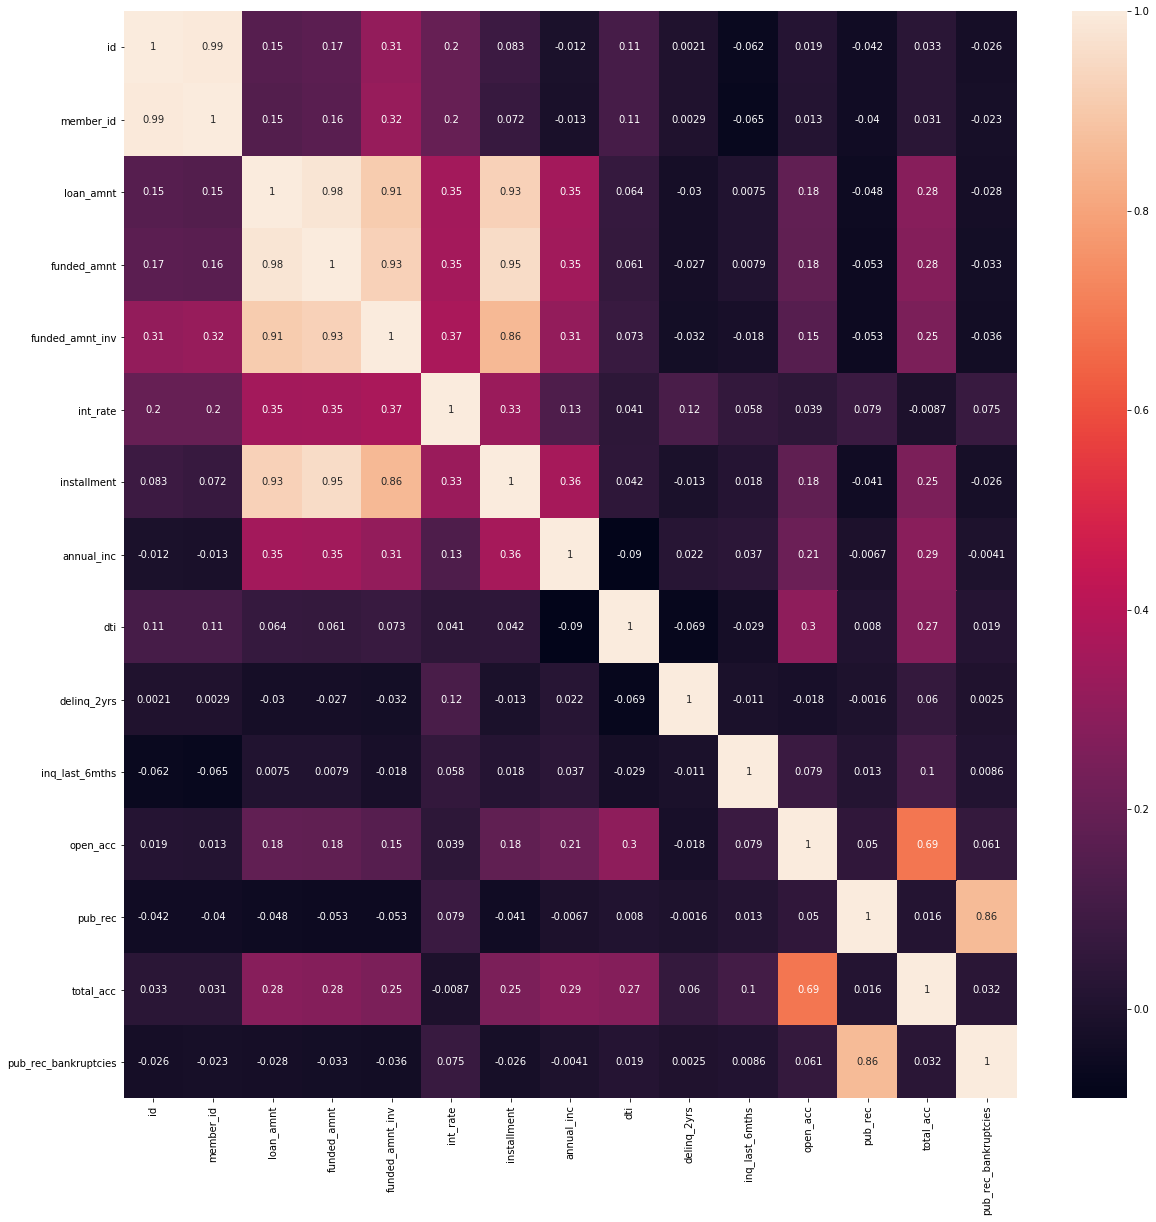

In [71]:
corr_df = default_paid_df.corr(method='pearson')
plt.subplots(figsize=(20, 20))
sns.heatmap(corr_df, annot=True,
          xticklabels=corr_df.columns.values,
          yticklabels=corr_df.columns.values)
plt.show()

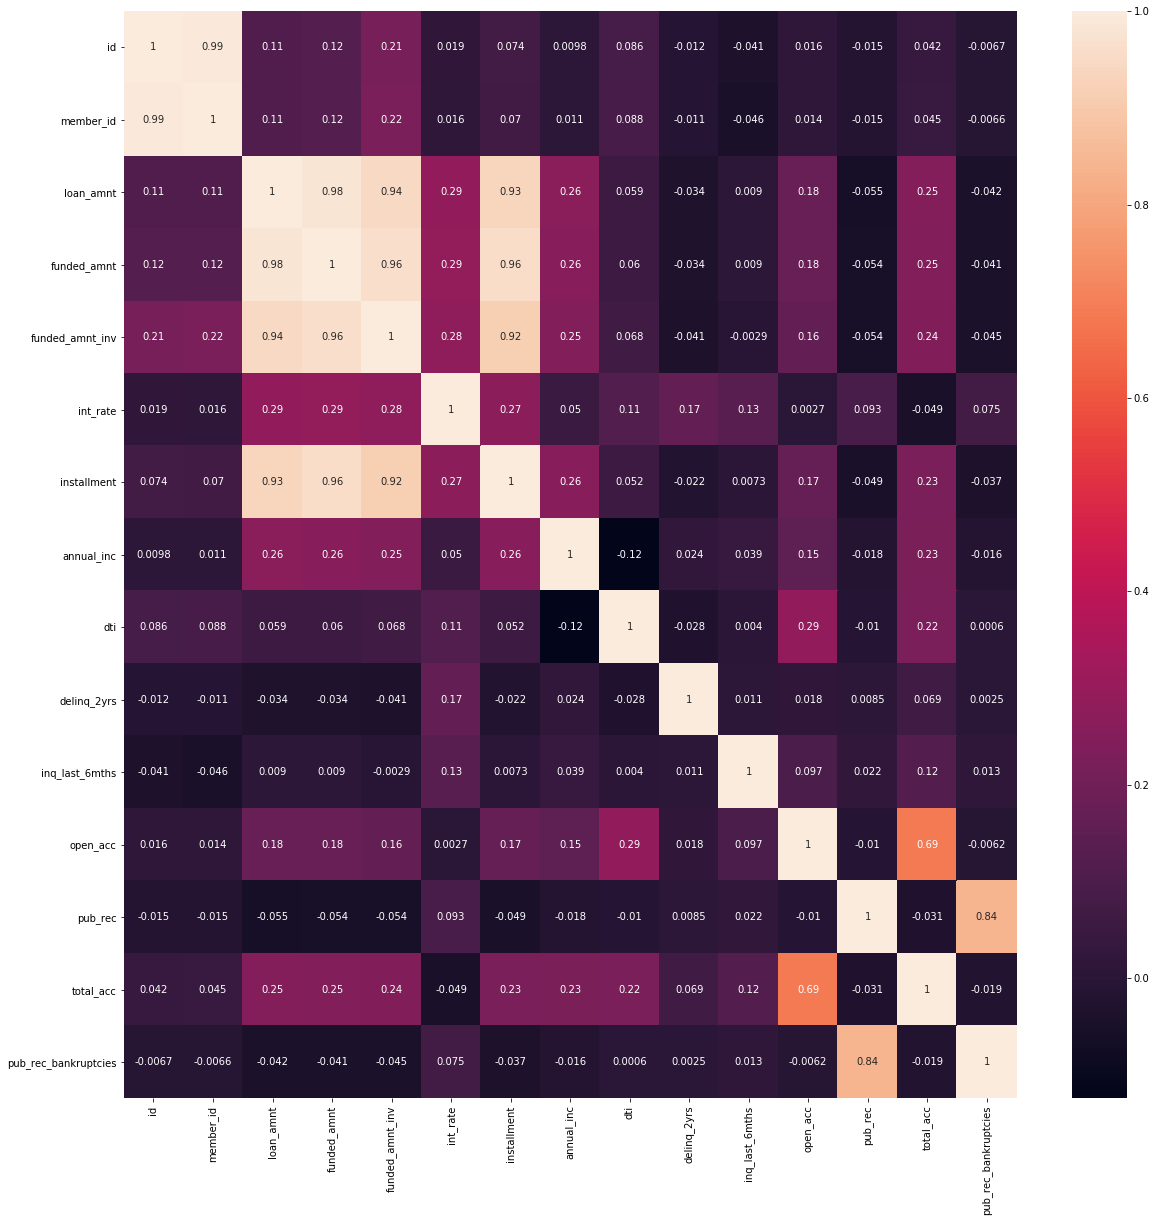

In [72]:
corr_df = fully_paid_df.corr(method='pearson')
plt.subplots(figsize=(20, 20))
sns.heatmap(corr_df, annot=True,
          xticklabels=corr_df.columns.values,
          yticklabels=corr_df.columns.values)
plt.show()